In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
!pip install -r req.txt

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------- --------- 122.9/165.5 kB 3.6 MB/s eta 0:00:01
     ---------------------------- --------- 122.9/165.5 kB 3.6 MB/s eta 0:00:01
     ---------------------------- --------- 122.9/165.5 kB 3.6 MB/s eta 0:00:01
     ---------------------------- --------- 122.9/165.5 kB 3.6 MB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 764.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.5 MB 9.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.5 MB 7.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.5 MB 8.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.5 MB 8.4 MB/s eta 0:00:02
   

##### ### Key Name	Description
1. 
Loan_ID	Unique Lo
a    n ID2. 
Gender	Male/ F    
    emal3. e
Married	Applicant married    
     (Y/4. N)
Dependents	Number of dep    
    ende5. nts
Education	Applicant Education (Graduate/ Under G    
    radu6. ate)
Self_Employed	Self-emplo    
    yed 7. (Y/N)
ApplicantIncome	Applic    
    ant 8. income
CoapplicantIncome	Coappli    
    cant9.  income
LoanAmount	Loan amount     
    in t10. housands
Loan_Amount_Term	Term of a l    
    oan 11. in months
Credit_History	credit history me    
    ets 12. guidelines
Property_Area	Urban/ Se    
    mi-U13. rban/ Rural
Loan_Status	Loan approved (Y/N)


In [104]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,LP001002,0,Graduate,0.0,5849,NaN,1.0,1
1,LP001003,1,Graduate,0.0,4583,128.0,1.0,0
2,LP001005,0,Graduate,NaN,3000,66.0,1.0,1
3,LP001006,0,0t Graduate,0.0,2583,120.0,1.0,1
4,LP001008,0,Graduate,0.0,6000,141.0,1.0,1


Remove loan id column (irrelevant)

In [105]:
df.drop(["Loan_ID"], axis="columns", inplace=True)
df.dropna(inplace=True)

In [106]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,Graduate,0.0,4583,128.0,1.0,0
3,0,0t Graduate,0.0,2583,120.0,1.0,1
4,0,Graduate,0.0,6000,141.0,1.0,1
6,0,0t Graduate,0.0,2333,95.0,1.0,1
7,3+,Graduate,0.0,3036,158.0,0.0,0
...,...,...,...,...,...,...,...
608,0,Graduate,0.0,3232,108.0,1.0,1
609,0,Graduate,0.0,2900,71.0,1.0,1
610,3+,Graduate,0.0,4106,40.0,1.0,1
611,1,Graduate,0.0,8072,253.0,1.0,1


edit and convert number on string data to numeric

convert y/n and male/female data to 1/0

In [108]:
#df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
#df['Property_Area'] = pd.factorize(df['Property_Area'])[0] + 1
#df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, "Not Graduate": 0})
df["Credit_History"] = pd.to_numeric(df['Credit_History'], errors='coerce').astype(int)
df["LoanAmount"] = pd.to_numeric(df['LoanAmount'], errors='coerce').astype(int)

base on dataset source, loan amount are written in thousands so we will use the real number

In [109]:
df["LoanAmount"] = df.LoanAmount*1000

look at features correlation and remove unperformed features

In [110]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,1,0.0,4583,128000,1,0
3,0,0t Graduate,0.0,2583,120000,1,1
4,0,1,0.0,6000,141000,1,1
6,0,0t Graduate,0.0,2333,95000,1,1
7,3+,1,0.0,3036,158000,0,0
...,...,...,...,...,...,...,...
608,0,1,0.0,3232,108000,1,1
609,0,1,0.0,2900,71000,1,1
610,3+,1,0.0,4106,40000,1,1
611,1,1,0.0,8072,253000,1,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 1 to 612
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dependents       434 non-null    object 
 1   Education        434 non-null    object 
 2   Self_Employed    434 non-null    float64
 3   ApplicantIncome  434 non-null    int64  
 4   LoanAmount       434 non-null    int32  
 5   Credit_History   434 non-null    int32  
 6   Loan_Status      434 non-null    int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 23.7+ KB


In [112]:
df['Dependents'] = df['Dependents'].str.replace('3+', '3')
df['Education'] = df['Education'].str.replace('0t Graduate', '0')
df['Education'].fillna(1, inplace=True)

C:\Users\Test\AppData\Local\Temp\ipykernel_6372\3077173078.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].fillna(1, inplace=True)


In [113]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,1,0.0,4583,128000,1,0
3,0,0,0.0,2583,120000,1,1
4,0,1,0.0,6000,141000,1,1
6,0,0,0.0,2333,95000,1,1
7,3,1,0.0,3036,158000,0,0
...,...,...,...,...,...,...,...
608,0,1,0.0,3232,108000,1,1
609,0,1,0.0,2900,71000,1,1
610,3,1,0.0,4106,40000,1,1
611,1,1,0.0,8072,253000,1,1


In [114]:
df.drop(columns=["Self_Employed"], inplace=True)

In [115]:
df

,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,1,4583,128000,1,0
3,0,0,2583,120000,1,1
4,0,1,6000,141000,1,1
6,0,0,2333,95000,1,1
7,3,1,3036,158000,0,0
...,...,...,...,...,...,...
608,0,1,3232,108000,1,1
609,0,1,2900,71000,1,1
610,3,1,4106,40000,1,1
611,1,1,8072,253000,1,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 1 to 612
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Dependents       434 non-null    object
 1   Education        434 non-null    object
 2   ApplicantIncome  434 non-null    int64 
 3   LoanAmount       434 non-null    int32 
 4   Credit_History   434 non-null    int32 
 5   Loan_Status      434 non-null    int64 
dtypes: int32(2), int64(2), object(2)
memory usage: 20.3+ KB


In [117]:
df["Dependents"] = pd.to_numeric(df['Dependents'], errors='coerce').astype(int)
df["Education"] = pd.to_numeric(df['Education'], errors='coerce').astype(int)
df

,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,1,4583,128000,1,0
3,0,0,2583,120000,1,1
4,0,1,6000,141000,1,1
6,0,0,2333,95000,1,1
7,3,1,3036,158000,0,0
...,...,...,...,...,...,...
608,0,1,3232,108000,1,1
609,0,1,2900,71000,1,1
610,3,1,4106,40000,1,1
611,1,1,8072,253000,1,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 1 to 612
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Dependents       434 non-null    int32
 1   Education        434 non-null    int32
 2   ApplicantIncome  434 non-null    int64
 3   LoanAmount       434 non-null    int32
 4   Credit_History   434 non-null    int32
 5   Loan_Status      434 non-null    int64
dtypes: int32(4), int64(2)
memory usage: 17.0 KB


In [119]:
scaler = StandardScaler()
df[["ApplicantIncome", "LoanAmount"]] = scaler.fit_transform(df[["ApplicantIncome", "LoanAmount"]])

each column impact on loan status visualization

In [120]:
df[df.Loan_Status == 1].shape

(298, 6)

In [121]:
df[df.Loan_Status == 0].shape

(136, 6)

<b> 4. Data Preparation

In [122]:
#Extracting Independent and dependent Variable  
X = df.drop(["Loan_Status"], axis=1)
y = df['Loan_Status']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

<b> 5. Create LOGISTIC Regression model

#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  


In [124]:
classifier = LogisticRegression(C=1, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8473282442748091

In [125]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

In [127]:
cm

array([[21, 18],
       [ 2, 90]], dtype=int64)

In [128]:
acc

0.8473282442748091

In [60]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB 2.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

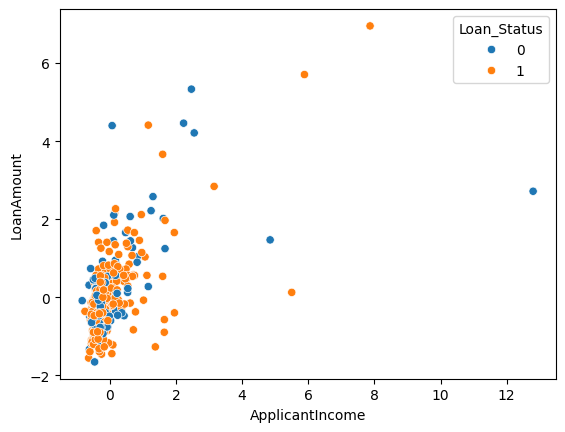

In [61]:
import seaborn as sns
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status',data=df)

In [129]:
pickle.dump(classifier, open('logisticloannew.pkl','wb'))

In [130]:
pickle.dump(scaler, open('scalerloan.pkl','wb'))

In [131]:
X_train[:10]

,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History
67,1,1,0.951080,2.118637,1
266,2,1,-0.068052,0.101150,1
17,0,1,-0.270124,-0.820418,0
272,0,1,-0.384316,-0.197737,1
281,0,1,-0.199786,-0.372088,1
431,0,1,0.234213,-0.459263,0
298,0,1,-0.018799,0.113603,1
375,0,1,-0.049666,-0.272459,1
177,3,1,0.068237,4.397649,0
368,1,1,0.204695,0.412490,1


In [132]:
y_train[:10]

67     1
266    1
17     0
272    1
281    1
431    0
298    0
375    1
177    0
368    1
Name: Loan_Status, dtype: int64

In [133]:
data = scaler.transform([[3500, 450000]])
p1 = data[0,0]
p2 = data[0,1]
classifier.predict([[1,1,p1,p2,0]])  

C:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)